# Understanding Logistic Regression

Logistic Regression is a widely used method for modeling binary dependent variables (e.g., success/failure, 1/0). Unlike models that estimate continuous outcomes, it estimates the probability of an event occurring by transforming a linear combination of predictor variables into a probability using the logistic function.

<br>

---

<br>

## Key Concepts

### 1. Logistic Function and Probabilities

<dl>
<dd>
The logistic (or sigmoid) function converts the result of the linear combination of predictors into a probability between 0 and 1. It is expressed as:
</dd>


<br>

<dt>
$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p)}}
$$
</dt>

<dd>

Here:

<dd>

* $\beta_0$ is the intercept.


* $\beta_1$, $\beta_2$, $\dots$, $\beta_p$ are the coefficients that measure the impact of each predictor $X_1$, $X_2$, $\dots$, $X_p$ on the probability of the event occurring.

</dl>

### 2. Logit Transformation (Log-Odds)

<dl>
<dd>
Logistic regression can be rewritten in the logit form, where the logarithm of the odds is modeled linearly:
</dd>

<br>

<dt>
$$
\log\left(\frac{P(Y=1 \mid X)}{1 - P(Y=1 \mid X)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p
$$
</dt>
<br>


<dd>
This transformation allows us to interpret each coefficient \( \beta \) as the change in the log-odds of the event for a one-unit change in the corresponding predictor variable.
</dd>
</dl>

### 3. Estimation of the Coefficients

<dl>
<dd>
Unlike least squares models, the coefficients in logistic regression are estimated using Maximum Likelihood Estimation (MLE). This method seeks the values of the coefficients that maximize the probability of observing the sampled data.
</dd>
</dl>

<br>

---

<br>

## Interpreting Logistic Regression

### 1. Odds Ratio (OR)

<dl>
<dd>
By exponentiating the coefficients, we obtain the odds ratios:
</dd>

<br>

<dt>
$$
OR = e^{\beta}
$$
</dt>
<br>


<dd>

- If \( OR > 1 \), an increase in the predictor variable is associated with higher odds of the event occurring.
- If \( OR < 1 \), the odds of the event occurring decrease.
- If \( OR = 1 \), the variable has no effect on the probability of the event.

</dd>
</dl>

### 2. Confidence Intervals (CI)

<dl>
<dd>
To assess statistical significance, we compute the confidence interval (usually 95%) for the odds ratio:
</dd>

<br>

<dt>
$$
CI = \left[e^{(\beta - 1.96 \cdot \sigma)}, \, e^{(\beta + 1.96 \cdot \sigma)}\right]
$$
</dt>
<br>


<dd>

- If the interval does not include 1, the effect of the variable is considered statistically significant.
- If it includes 1, the effect may not be significant.

</dd>
</dl>

### 3. p-value

<dl>
<dd>
The p-value tests the null hypothesis that the coefficient is zero (i.e., that the variable does not affect the probability of the event).
</dd>

<dd>

- If \( p < 0.05 \), the effect is statistically significant.
- If \( p \geq 0.05 \), there is insufficient evidence that the variable affects the event.

</dd>
</dl>

<br>

---

<br>

## Advantages of Logistic Regression

<dl>
<dd>

- **Direct Probabilities:** It provides a direct estimate of the probability of the event, making interpretation straightforward.
- **Interpretable Coefficients:** The odds ratios allow for a clear understanding of the impact of each predictor.
- **Flexibility:** It can be easily extended to multiclass classifications (via multinomial logistic regression) and applied in various fields such as medicine, marketing, and social sciences.

</dd>
</dl>

## Limitations of Logistic Regression

<dl>
<dd>

- **Linearity Assumption in the Logit:** The model assumes that the relationship between the predictor variables and the log-odds is linear.
- **Sensitivity to Outliers:** Extreme values can influence the estimation of the coefficients.
- **Multicollinearity:** High correlations among predictors can distort the estimates and the interpretation of their effects.

</dd>
</dl>

<br>

---

<br>





# Implementing the Logistic Regression Model in Python

## Full Code

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def execute_glm_regression(elr_dataframe_df, elr_outcome_str, elr_predictors_list,
                           model_type='linear', print_results=True, labels=False, reg_type="Multi"):
    """
    Executes a GLM (Generalized Linear Model) for linear or logistic regression.

    Parameters:
    - elr_dataframe_df: Pandas DataFrame containing the data.
    - elr_outcome_str: Name of the outcome variable.
    - elr_predictors_list: List of predictor variable names.
    - model_type: 'linear' for linear regression (Gaussian) or 'logistic' for logistic regression (Binomial).
    - print_results: If True, prints the results table.
    - labels: (Optional) Dictionary to map variable names to human-readable labels.
    - reg_type: Regression type ('uni' or 'multi') to rename the output columns.

    Returns:
    - summary_df: DataFrame with the model results.
    """

    # 1. Define the family based on model_type
    if model_type.lower() == 'logistic':
        family = sm.families.Binomial()
    elif model_type.lower() == 'linear':
        family = sm.families.Gaussian()
    else:
        raise ValueError("model_type must be 'linear' or 'logistic'")

    # 2. Build the formula string for the regression model
    formula = elr_outcome_str + ' ~ ' + ' + '.join(elr_predictors_list)

    # 3. Convert categorical variables to the 'category' type
    categorical_vars = elr_dataframe_df.select_dtypes(include=['object', 'category']).columns.intersection(elr_predictors_list)
    for var in categorical_vars:
        elr_dataframe_df[var] = elr_dataframe_df[var].astype('category')

    # 4. Fit the GLM model using the specified formula, data, and family
    model = smf.glm(formula=formula, data=elr_dataframe_df, family=family)
    result = model.fit()

    # 5. Extract the results table from the model summary
    summary_table = result.summary2().tables[1].copy()

    # 6. Process the results for logistic or linear regression
    if model_type.lower() == 'logistic':
        # For logistic regression, compute Odds Ratios and their confidence intervals
        summary_table['Odds Ratio'] = np.exp(summary_table['Coef.'])
        summary_table['IC Low'] = np.exp(summary_table['[0.025'])
        summary_table['IC High'] = np.exp(summary_table['0.975]'])

        summary_df = summary_table[['Odds Ratio', 'IC Low', 'IC High', 'P>|z|']].reset_index()
        summary_df = summary_df.rename(columns={'index': 'Study',
                                                  'Odds Ratio': 'OddsRatio',
                                                  'IC Low': 'LowerCI',
                                                  'IC High': 'UpperCI',
                                                  'P>|z|': 'p-value'})
    else:
        # For linear regression, use the coefficients and confidence intervals directly
        summary_df = summary_table[['Coef.', '[0.025', '0.975]', 'P>|z|']].reset_index()
        summary_df = summary_df.rename(columns={'index': 'Study',
                                                  'Coef.': 'Coefficient',
                                                  '[0.025': 'LowerCI',
                                                  '0.975]': 'UpperCI',
                                                  'P>|z|': 'p-value'})

    # 7. Map variable names to human-readable labels if a labels dictionary is provided
    if labels:
        def parse_variable_name(var_name):
            if var_name == 'Intercept':
                return labels.get('Intercept', 'Intercept')
            elif '[' in var_name:
                base_var = var_name.split('[')[0]
                level = var_name.split('[')[1].split(']')[0]
                base_var_name = base_var.replace('C(', '').replace(')', '').strip()
                label = labels.get(base_var_name, base_var_name)
                return f'{label} ({level})'
            else:
                var_name_clean = var_name.replace('C(', '').replace(')', '').strip()
                return labels.get(var_name_clean, var_name_clean)
        summary_df['Study'] = summary_df['Study'].apply(parse_variable_name)

    # 8. Reorder the columns for clarity
    if model_type.lower() == 'logistic':
        summary_df = summary_df[['Study', 'OddsRatio', 'LowerCI', 'UpperCI', 'p-value']]
    else:
        summary_df = summary_df[['Study', 'Coefficient', 'LowerCI', 'UpperCI', 'p-value']]

    # 9. Remove the letter 'T.' from categorical variable names
    summary_df['Study'] = summary_df['Study'].str.replace('T.', '')

    # 10. Format numerical values (round coefficients and confidence intervals, format p-values)
    for col in summary_df.columns[1:-1]:
        summary_df[col] = summary_df[col].round(3)
    summary_df['p-value'] = summary_df['p-value'].apply(lambda x: f'{x:.4f}')

    # 11. Optionally remove the intercept row if not needed
    summary_df = summary_df[summary_df['Study'] != 'Intercept']

    # 12. Rename columns based on the regression type (univariate or multivariate)
    if reg_type.lower() == 'uni':
        if model_type.lower() == 'logistic':
            summary_df.rename(columns={
                'OddsRatio': 'OddsRatio (uni)',
                'LowerCI': 'LowerCI (uni)',
                'UpperCI': 'UpperCI (uni)',
                'p-value': 'p-value (uni)'
            }, inplace=True)
        else:
            summary_df.rename(columns={
                'Coefficient': 'Coefficient (uni)',
                'LowerCI': 'LowerCI (uni)',
                'UpperCI': 'UpperCI (uni)',
                'p-value': 'p-value (uni)'
            }, inplace=True)
    elif reg_type.lower() == 'multi':
        if model_type.lower() == 'logistic':
            summary_df.rename(columns={
                'OddsRatio': 'OddsRatio (multi)',
                'LowerCI': 'LowerCI (multi)',
                'UpperCI': 'UpperCI (multi)',
                'p-value': 'p-value (multi)'
            }, inplace=True)
        else:
            summary_df.rename(columns={
                'Coefficient': 'Coefficient (multi)',
                'LowerCI': 'LowerCI (multi)',
                'UpperCI': 'UpperCI (multi)',
                'p-value': 'p-value (multi)'
            }, inplace=True)

    # 13. Print the results if print_results is True
    if print_results:
        print(summary_df)

    # 14. Return the summary DataFrame with all the model results
    return summary_df



```
# Isto está formatado como código
```

##  Inputs

- `elr_dataframe_df`: A Pandas DataFrame containing the input data.
- `elr_outcome_str`: The name of the binary outcome (dependent) variable (0 or 1).
- `elr_predictors_list`: A list of predictor (independent) variable names.
- `model_type`: Set to `'logistic'` for logistic regression.
- `print_results`: If `True`, prints the formatted results table.
- `labels` *(optional)*: A dictionary mapping variable names to human-readable labels.
- `reg_type`: `'uni'` or `'multi'` – determines the suffix in the output column names.

---

##  Output

A formatted `DataFrame` containing:

- Predictor names (converted to readable labels if `labels` is provided)
- **Odds Ratios**
- **95% Confidence Intervals**
- **p-values**
- Column names adjusted based on regression type (`uni` or `multi`)





---

# User Case Example

In the following example, we will be doing a **Logistic Regression** using a synthetic data do show to would be the implementation of the code in a real cenario.

In the following code we are implementing a Logistic Regression to a synthetic data, the Logistic Regression will be on top of age and sex.


---

## Defining Variables

Before a Logistic Regression, we need to define the predictors variable(s) and the outcome variable we want to analyze. In our example we are analyzing Death rate by Age. In addition, is important to notice that the database I will be using is synthetic data, so the results that will be displayed are not real just a example of what the function Logistic Regression is able to do.

---

## Importing libraries

In [3]:
import pandas as pd
from google.colab import files

---

## Gathering data from database

In this step, normally what would happen is that you would only declare what data will be analyzed and execute the function. However, in this dataset, the outcome variables were not Binary but categorical, and the logistic regression only execpts binary variable as a outcome. So was needed to create a binary reference from the outcome variable. Although, this is from case to case.

In [4]:
# Uploading data set
uploaded = files.upload()
df_map = pd.read_csv("df_map.csv")

# Creating binary variables for age, as age is between 0-110 in the normal dataset.
bins = list(range(0, 110, 10))
labels = [f"{i}_{i+10}" for i in bins[:-1]]

df_map['age_bin'] = pd.cut(df_map['demog_age'], bins=bins, labels=labels, right=False)

age_dummies = pd.get_dummies(df_map['age_bin'], prefix='age')
df_map = pd.concat([df_map, age_dummies], axis=1)

# Choosing one category for outcome, as this is not a multinomial regression.
df_map['outcome_binary'] = (df_map['outco_binary_outcome'] == 'Death').astype(int)

# Defining outcome and predictors variables
outcome = "outcome_binary"
predictors = ["demog_sex" , "age_bin"]

Saving df_map.csv to df_map.csv


---

## Executing the function

To execute the function we will input the variables that we chose and most importantly, choose the model_type to be logistic. Otherwise it will execute a linear regression. Also, want to print the results and we are doing a multivariet regression.

In [5]:
logistic_response = execute_glm_regression(
    elr_dataframe_df=df_map,
    elr_outcome_str=outcome,
    elr_predictors_list=predictors,
    model_type='logistic',
    print_results=True,
    labels=False,
    reg_type="Multi"
)

              Study  OddsRatio (multi)  LowerCI (multi)  UpperCI (multi)  \
1   demog_sex[Male]              1.700            1.080            2.675   
2    age_bin[10_20]              0.000            0.000              inf   
3    age_bin[20_30]              1.191            0.258            5.502   
4    age_bin[30_40]              0.775            0.156            3.855   
5    age_bin[40_50]              1.508            0.332            6.847   
6    age_bin[50_60]              0.609            0.112            3.312   
7    age_bin[60_70]              1.057            0.207            5.396   
8    age_bin[70_80]              2.389            0.517           11.027   
9    age_bin[80_90]              2.326            0.486           11.135   
10  age_bin[90_100]              3.080            0.450           21.067   

   p-value (multi)  
1           0.0218  
2           0.9990  
3           0.8231  
4           0.7550  
5           0.5948  
6           0.5661  
7           0.94

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


---

## Analyzing results with Forest Plot

Forest Plot is a graphical method of analyzing the result table of the logistic regression. Where each point is a OddsRation and is visible the Lower and Upper confidence interval.

Below is the full code for the Forest Plot:

In [6]:
import pandas as pd
import plotly.graph_objs as go


def fig_forest_plot(
        df, dictionary=None,
        title='Forest Plot',
        labels=['Study', 'OddsRatio', 'LowerCI', 'UpperCI'],
        graph_id='forest-plot', graph_label='', graph_about='',
        only_display=False):

    # Ordering Values -> Descending Order
    df = df.sort_values(by=labels[1], ascending=True)

    # Error Handling
    if not set(labels).issubset(df.columns):
        print(df.columns)
        error_str = f'Dataframe must contain the following columns: {labels}'
        raise ValueError(error_str)

    # Prepare Data Traces
    traces = []

    # Add the point estimates as scatter plot points
    traces.append(
        go.Scatter(
            x=df[labels[1]],
            y=df[labels[0]],
            mode='markers',
            name='Odds Ratio',
            marker=dict(color='blue', size=10))
    )

    # Add the confidence intervals as lines
    for index, row in df.iterrows():
        traces.append(
            go.Scatter(
                x=[row[labels[2]], row[labels[3]]],
                y=[row[labels[0]], row[labels[0]]],
                mode='lines',
                showlegend=False,
                line=dict(color='blue', width=2))
        )

    # Define layout
    layout = go.Layout(
        title=title,
        xaxis=dict(title='Odds Ratio'),
        yaxis=dict(
            title='', automargin=True, tickmode='array',
            tickvals=df[labels[0]].tolist(), ticktext=df[labels[0]].tolist()),
        shapes=[
            dict(
                type='line', x0=1, y0=-0.5, x1=1, y1=len(df[labels[0]])-0.5,
                line=dict(color='red', width=2)
            )],  # Line of no effect
        margin=dict(l=100, r=100, t=100, b=50),
        height=600
    )

    return go.Figure(data=traces, layout=layout)

---

## Executing Forest Plot

In [7]:
graph = fig_forest_plot(
    df = logistic_response,
    labels = logistic_response.columns.tolist(),
    only_display=True
)

graph.show()

---
# Assumptions

Are the theoretical conditions that should be met for the regression model to be valid and reliable, although logistic regression does not assume a linear relationship between the predictors and the outcome, it does rely on several key assumptions that should be evaluated:



---
## Binary Dependent Variable
**What it means:**

Logistic regression assumes a binary outcome (e.g., 0 = No, 1 = Yes). Multinomial logistic regression is required for outcomes with more than two categories.

**How to check:**

Ensure the dependent variable has only two levels and is coded as 0/1 (or convertible to that format).

In [8]:
print(df_map[outcome].value_counts())
print(df_map[outcome].unique())

outcome_binary
0    912
1     88
Name: count, dtype: int64
[0 1]


**Interpretaton:**

The dependent variable (outcome_binary) is coded as 0 and 1, with a total of 1000 observations. This satisfies the fundamental requirement of a binary outcome.

---
## Independence of Observations
**What it means:**

Each observation in the dataset should be independent of others. Logistic regression does not handle correlated or clustered data natively.

**How to check:**

Evaluate the study design (e.g., no repeated measurements or hierarchical/clustered structure).

If dependency exists (e.g., longitudinal or panel data), consider mixed models (GLMM) or Generalized Estimating Equations (GEE).

**Note:**

Independence of observations is primarily a design issue. Statistical tests cannot directly confirm this assumption, so it's important to ensure that the data collection process avoids repeated measures or clustering unless appropriately modeled.

---

## Linearity of the Logit


**What it means:**

Logistic regression assumes a linear relationship between the continuous predictors and the logit (log-odds) of the binary outcome, not the outcome itself.


**How to check (if continuous predictors are present):**

There are two main approaches:

1. **Box-Tidwell Test**  
   For each continuous variable \( X \), test the interaction between \( X \) and \( log(X) \) using a model of the form:

   $$
   \text{logit}(p) = \beta_0 + \beta_1 X + \beta_2 (X \cdot \log X)
   $$

   If the interaction term is statistically significant (p < 0.05), the linearity assumption is violated.

2. **Visual Inspection**  
   Plot the continuous variable against the logit of the predicted probability:

   $$
   \text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
   $$

   If the relationship is not linear (e.g., curved or U-shaped), consider transformations.

**What to do if violated:**

- Apply mathematical transformations (e.g., log, square root)
- Include polynomial terms (e.g., \( X^2 \), \( X^3 \))
- Use splines or other nonlinear modeling approaches

**Formula of the logit:**

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \dots + \beta_k X_k
$$


**Analysis:**

In the present model, no continuous variables are included among the predictors. All independent variables used are categorical, either in their original form (e.g., sex) or transformed into categorical bins (e.g., age_bin), and subsequently represented using dummy variables.

As a result, the assumption of linearity in the logit does not apply to this model. Categorical variables are not expected to have a linear relationship with the logit; instead, they enter the model as binary indicators, which are appropriately handled by the logistic regression algorithm without violating its assumptions.

Therefore, no test for linearity of the logit (e.g., Box–Tidwell test) was necessary or conducted.

---
## No Multicollinearity:

**What it means:** Independent variables are not perfectly correlated with each other.

**How to check:** Calculate the Variance Inflation Factor (VIF) for each predictor. Examine correlation matrices to identify highly correlated predictors.

The Variance Inflation Factor is calculated as:

VIF<sub>j</sub> = 1 / (1 - R²VIF<sub>j</sub>)

Where:

R²VIF<sub>j</sub> is the coefficient of determination obtained by regressing predictor Xj on all the other predictors in the model.

A higher VIF means stronger multicollinearity.

Interpretation:

**VIF = 1** No multicollinearity. The predictor is not correlated with other predictors.

**VIF between 1 and 5** Moderate multicollinearity. Usually acceptable, but monitor closely.

**VIF > 5** Potential multicollinearity problem. Consider investigating the correlated predictors.

**VIF ≥ 10** Severe multicollinearity. Strongly consider removing or combining variables.



In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = pd.get_dummies(df_map[["demog_sex", "age_bin"]], drop_first=True)


X = sm.add_constant(X)

X = X.astype(int)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["Variable"] != "const"]
print(vif_data)


          Variable       VIF
1   demog_sex_Male  1.015194
2    age_bin_10_20  1.658783
3    age_bin_20_30  5.598475
4    age_bin_30_40  4.790889
5    age_bin_40_50  5.656839
6    age_bin_50_60  4.144040
7    age_bin_60_70  3.673314
8    age_bin_70_80  3.977226
9    age_bin_80_90  3.217260
10  age_bin_90_100  1.455663



**Conclusion:**  
Multicollinearity does not appear to be a serious concern in this model. All VIF values are within or near acceptable ranges, and the model specification is considered stable with respect to this assumption.

---
## Sufficient Sample Size and Events per Predictor

**What it means:**

Logistic regression relies on Maximum Likelihood Estimation (MLE), which requires a sufficiently large dataset to ensure reliable and stable parameter estimates.

**Rule of thumb:**

You should have at least 10 outcome events per predictor (EPV ≥ 10).

For binary outcomes, count the number of 1’s (or the less frequent class).

**Example:**

If you have 5 predictors, you need at least 50 cases where outcome = 1.

**Why it matters:**

Low EPV may cause:

* Biased coefficients

* Wide confidence intervals

* Convergence failures

* Overfitting

In [10]:
n_events = df_map[outcome].sum()
n_predictors = len(predictors)
epv = n_events / n_predictors
print(f"EPV: {epv:.2f}")

EPV: 44.00


**Interpretation:**

A commonly cited rule of thumb recommends at least **10 events per predictor variable** (EPV ≥ 10) to ensure reliable coefficient estimates and model convergence.

With an EPV of **44.00**, this model comfortably exceeds that threshold

---
## Absence of Influential Outliers
**What it means:**

Extreme data points (in terms of leverage or residuals) can overly influence the fitted model.

**How to check:**

Examine standardized residuals, deviance residuals, or studentized residuals.

Use Cook’s distance, leverage values (hat values), or DFBETA diagnostics to detect influence.

In [11]:
import statsmodels.api as sm
import numpy as np


y = df_map["outcome_binary"].astype(float)

model = sm.Logit(y, X).fit(maxiter=100)


influence = model.get_influence()


cooks_d = influence.cooks_distance[0]


leverage = influence.hat_matrix_diag


pearson_resid = model.resid_pearson
deviance_resid = model.resid_dev


dfbetas = influence.dfbetas


influential_points = np.where(cooks_d > 4 / model.nobs)[0]

print(f"Number of influential points (Cook's D > 4/n): {len(influential_points)}")
print("Top 5 Cook's distances:")
print(cooks_d[influential_points][:5])


Optimization terminated successfully.
         Current function value: 0.284479
         Iterations 73
Number of influential points (Cook's D > 4/n): 88
Top 5 Cook's distances:
[0.0062233  0.00719829 0.00591422 0.01275596 0.00487977]


**Interpretation:**

- 88 observations exceed the threshold of Cook’s D > 0.004.
- However, the **magnitude** of Cook’s distances is relatively low — all below 0.013.
- This suggests that although a moderate number of observations are flagged, **no single point has an unduly large influence** on the model.
- These values do not raise major concerns about model instability, but further investigation of the flagged cases (e.g., leverage or unusual patterns) may still be warranted.

**Conclusion:**  
The influence analysis does not reveal extreme outliers or highly influential points. The logistic regression model appears robust with respect to individual data points.

---
# Evaluating Predictive Quality

## Accuracy

**What it means:**

The proportion of correct predictions (both positives and negatives) over all predictions.

**How to check:**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Higher accuracy indicates better overall prediction, but it can be misleading if the classes are imbalanced.

In [40]:
from sklearn.metrics import accuracy_score

y_pred_class = (model.predict() >= 0.1017).astype(int) #threshold adjustment: 0.5 -> 0.1017
accuracy = accuracy_score(y, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.642


**Interpretation:**

* An accuracy of 0.642 means that approximately 64.2% of the outcomes were correctly predicted by the logistic regression model.

accuracy should be interpreted alongside other metrics such as:

* **Precision** — to assess the correctness of positive predictions;

* **Recall** — to evaluate how well the model detects actual positive cases;

* **F1 Score** — to balance precision and recall;

* **ROC AUC** — to measure the model’s discrimination ability across all thresholds.

**note:** The threshold adjustment significantly improves recall and overall F1 score, making the model better suited for applications where identifying the minority class is critical — such as in medical diagnosis or fraud detection scenarios.


---
## Log Loss (Binary Cross-Entropy)
**What it means:**

Measures the uncertainty of the predictions. It penalizes confident but wrong predictions more heavily.

**Interpretation:**

Log Loss quantifies how far the predicted probabilities are from the actual labels. Values close to 0 indicate well-calibrated predictions.

In [41]:
from sklearn.metrics import log_loss

logloss = log_loss(y, model.predict())
print("Log Loss:", logloss)

Log Loss: 0.2844787382685354


**Interpretation:**

A lower Log Loss indicates better-calibrated probabilistic predictions. A value of **0.2845** suggests that:

- The model's predicted probabilities are, on average, close to the true class labels;
- The classifier is relatively confident and correct in its predictions;
- The model performs well in balancing **calibration** and **discrimination**.

**Conclusion:**  
The Log Loss score is low, which indicates that the logistic regression model is making high-quality probability estimates. This complements other classification metrics like ROC AUC, precision, and recall.

---
## Confusion Matrix
**What it means:**

Breaks down the number of true positives, true negatives, false positives, and false negatives.

The matrix helps visualize what types of errors the model makes .

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[590 322]
 [ 36  52]]


**Interpretation:**

Out of 88 actual positive cases, the model correctly identified 52 (True Positives), resulting in a recall of approximately 59.1%. However, it also produced 322 False Positives — predicting many non-events as events — which lowers precision to about 13.9%.

The model still performs well in identifying positive cases compared to its original behavior, where recall was zero. This behavior is expected after adjusting the classification threshold to favor sensitivity.

In applications where missing a positive case is more critical than producing a false alarm (e.g., medical diagnostics), this trade-off may be acceptable. However, if false positives carry a significant cost, additional model tuning or resampling strategies (like SMOTE or cost-sensitive learning) should be considered.


---
## Precision, Recall, F1 Score
**What it means:**

* Precision: Out of all predicted positives, how many were correct?

* Recall (Sensitivity): Out of all actual positives, how many were correctly predicted?

* F1 Score: Harmonic mean of precision and recall.




In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, y_pred_class, zero_division=0)
recall    = recall_score(y, y_pred_class, zero_division=0)
f1        = f1_score(y, y_pred_class, zero_division=0)

print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

Precision: 0.139
Recall   : 0.5909
F1 Score : 0.2251


**Interpretation:**

**Precision (13.9%):** Among all the instances the model predicted as positive , only 13.9% were actually positive. This indicates a relatively high number of false positives.

**Recall (59.1%):** The model correctly identified 59.1% of all actual positive cases. This is a substantial improvement over the baseline ( at threshold = 0.5), reflecting better sensitivity to the minority class.

**F1 Score (22.5%):** The harmonic mean of precision and recall shows a modest but meaningful balance between the two. While the F1 score is still low, it's a significant gain compared to the initial model (F1 = 0).



---
## AUC – ROC Curve
**What it means:**

Measures the model’s ability to distinguish between the two classes across all probability thresholds.

AUC values range from 0.5 (no discrimination) to 1.0 (perfect).

**Interpretation:**

AUC represents the probability that a randomly chosen positive case ranks higher than a randomly chosen negative case. A model with AUC > 0.8 is generally considered good.

ROC AUC Score: 0.659


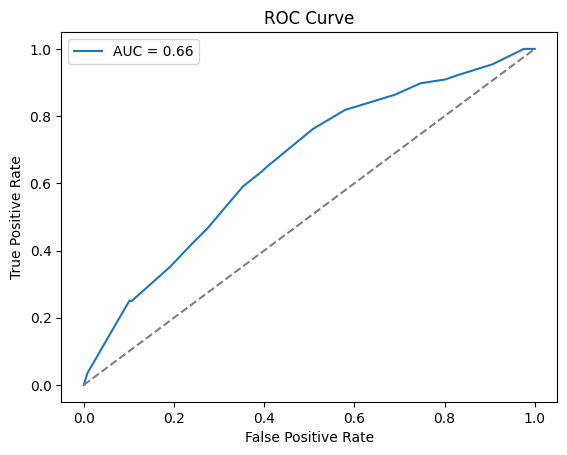

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



y_scores = model.predict()
auc = roc_auc_score(y, y_scores)
print(f"ROC AUC Score: {auc:.3f}")


fpr, tpr, thresholds = roc_curve(y, y_scores)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



**Interpretation:**

- An AUC of **0.659** suggests that the model has **moderate discriminative ability**.
- The score is **well above 0.5**, which would represent random guessing.


**Conclusion:**

The ROC AUC of 0.659 implies that the model contains **useful signal**, but performance may be improved by:
- Adjusting the classification threshold,
- Applying class balancing techniques,
- Adding more predictive variables.

This metric justifies further efforts to recalibrate or refine the model rather than discarding it outright.

## Cross-Validation for Logistic Regression

**What it means:**

Estimates how well the model generalizes to new data using repeated train/test splits.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Re-create X and y for scikit-learn
X_cv = pd.get_dummies(df_map[["demog_sex", "age_bin"]], drop_first=True).astype(float)
y_cv = df_map["outcome_binary"].astype(int)

clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf, X_cv, y_cv, cv=5, scoring="accuracy")

print("Cross-Validation Accuracies:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Accuracies: [0.915 0.915 0.91  0.91  0.91 ]
Mean Accuracy: 0.9120000000000001
Standard Deviation: 0.00244948974278318


**Interpretation:**

- The model achieves an **average accuracy of 91.2%**, which appears high at first glance.
- The **low standard deviation (±0.0024)** indicates that the model's performance is highly consistent across different data subsets.
- Cross-Validation alone is **not a sufficient performance metric** in imbalanced classification problems — metrics like **recall, precision, F1 score**, and **ROC AUC** must also be considered.

**Conclusion:**

The logistic regression model demonstrates stability across cross-validation folds, as indicated by the low standard deviation in accuracy. While the overall accuracy is high (mean = 91.2%).

---

# References

* To learn more about numpy library, please go to the <a name='id_1'> <a href='https://numpy.org/'>Numpy WebPage</a>
<br>

* To learn more about pandas library, please go to the <a name='id_2'> <a href='https://pandas.pydata.org/'>Pandas WebPage</a>
<br>

* To learn more about statsmodels library, please go to the<a name='id_3'> <a href='https://www.statsmodels.org/stable/index.html'>StatsModels WebPage</a>
<br>

* To learn more about the Pip command, please go to the <a name='pip'>
<a href='https://pypi.org/project/pip/'>Pip WebPage</a>
<br>
